# Exploratory Data Analysis of the Lego Dataset

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the 'themes.csv' file

In [2]:
df_themes = pd.read_csv('files/themes.csv')
df_themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
650,685,Galidor,NaN
651,686,Chinese Traditional Festivals,NaN
652,687,Frozen II,608.0
653,688,DOTS,NaN


**Observation:**

**There are 655 Lego themes.**

## 3. Load the 'sets.csv' file

In [3]:
df_sets = pd.read_csv('files/sets.csv')
df_sets

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15661,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15662,XMASTREE-1,Christmas Tree,2019,410,26
15663,XWING-1,Mini X-Wing Fighter,2019,158,60
15664,XWING-2,X-Wing Trench Run,2019,158,52


## 4. Change the column name of the theme dataset from 'id' to 'theme_id'.

In [5]:
df_themes = df_themes.rename(columns = {'id':'theme_id'})
df_themes

,theme_id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
650,685,Galidor,NaN
651,686,Chinese Traditional Festivals,NaN
652,687,Frozen II,608.0
653,688,DOTS,NaN


## 5. Merge the themes and sets sub-datasets.

In [6]:
themes_sets = pd.merge(df_themes, df_sets, on = 'theme_id', how = 'left')
themes_sets

,theme_id,name_x,parent_id,set_num,name_y,year,num_parts
0,1,Technic,NaN,001-1,Gears,1965.0,43.0
1,1,Technic,NaN,002-1,4.5V Samsonite Gears Motor Set,1965.0,3.0
2,1,Technic,NaN,1030-1,TECHNIC I: Simple Machines Set,1985.0,191.0
3,1,Technic,NaN,1038-1,ERBIE the Robo-Car,1985.0,120.0
4,1,Technic,NaN,1039-1,Manual Control Set 1,1986.0,39.0
...,...,...,...,...,...,...,...
15737,689,Minions,NaN,75546-1,Minions in Gru’s Lab,2020.0,0.0
15738,689,Minions,NaN,75547-1,Minion Pilot in Training,2020.0,0.0
15739,689,Minions,NaN,75549-1,Unstoppable Bike Chase,2020.0,0.0
15740,689,Minions,NaN,75550-1,Minions Kung Fu Battle,2020.0,0.0


## 6. Rename 'name_x' and 'name_y' to 'theme_name' and 'set_name' respectively.

In [7]:
themes_sets = themes_sets.rename(columns = {'name_x':'theme_name','name_y':'set_name'})
themes_sets

,theme_id,theme_name,parent_id,set_num,set_name,year,num_parts
0,1,Technic,NaN,001-1,Gears,1965.0,43.0
1,1,Technic,NaN,002-1,4.5V Samsonite Gears Motor Set,1965.0,3.0
2,1,Technic,NaN,1030-1,TECHNIC I: Simple Machines Set,1985.0,191.0
3,1,Technic,NaN,1038-1,ERBIE the Robo-Car,1985.0,120.0
4,1,Technic,NaN,1039-1,Manual Control Set 1,1986.0,39.0
...,...,...,...,...,...,...,...
15737,689,Minions,NaN,75546-1,Minions in Gru’s Lab,2020.0,0.0
15738,689,Minions,NaN,75547-1,Minion Pilot in Training,2020.0,0.0
15739,689,Minions,NaN,75549-1,Unstoppable Bike Chase,2020.0,0.0
15740,689,Minions,NaN,75550-1,Minions Kung Fu Battle,2020.0,0.0


## 7. Exploratory Data Analysis

### 7.a. What are the top 5 Lego themes with the most number of sets?

In [14]:
theme_count = themes_sets['theme_name'].value_counts().reset_index().rename(columns = {'index':'theme_name', 'theme_name':'set_count'})
theme_count.head(5)

,theme_name,set_count
0,Star Wars,846
1,Gear,553
2,Basic Set,546
3,Supplemental,534
4,Technic,447


<AxesSubplot:xlabel='theme_name', ylabel='set_count'>

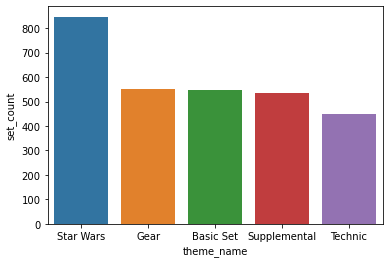

In [16]:
sns.barplot(x = 'theme_name', y = 'set_count', data = theme_count.head(5))

**Observation:**

**The top 5 Lego themes with the most number of sets are:**

1. **Star Wars**
2. **Gear**
3. **Basic Set**
4. **Supplemental**
5. **Technic**